In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("9-email_classification_svm.csv")

In [3]:
df.head()

,subject_formality_score,sender_relationship_score,email_type
0,-1.496790,0.779258,0
1,-1.217610,0.889601,0
2,-0.375945,-0.823324,1
3,0.639609,-0.362827,1
4,-1.342836,-1.040502,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   subject_formality_score    1000 non-null   float64
 1   sender_relationship_score  1000 non-null   float64
 2   email_type                 1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


<Axes: xlabel='subject_formality_score', ylabel='sender_relationship_score'>

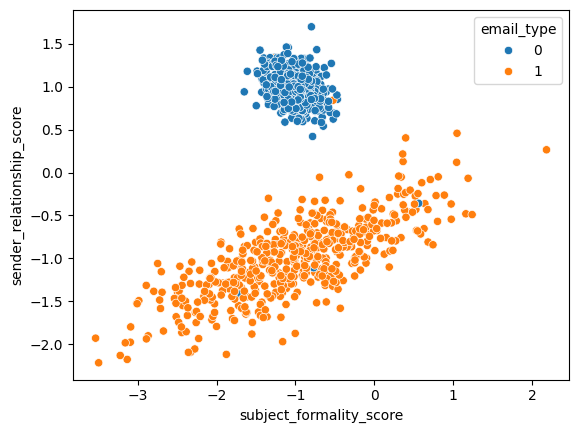

In [6]:
sns.scatterplot(x=df["subject_formality_score"], y=df["sender_relationship_score"], hue=df["email_type"])

In [8]:
X = df.drop("email_type", axis=1)
y = df["email_type"]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [11]:
from sklearn.svm import SVC

In [12]:
svc = SVC(kernel="linear")
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [13]:
y_pred = svc.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
confusion_matrix(y_test, y_pred)

array([[117,   1],
       [  0, 132]])

In [16]:
rbf = SVC(kernel="rbf")
rbf.fit(X_train, y_train)
y_pred = rbf.predict(X_test)


In [17]:
confusion_matrix(y_test, y_pred)

array([[117,   1],
       [  0, 132]])

In [18]:
df = pd.read_csv("9-loan_risk_svm.csv")

In [19]:
df.head()

,credit_score_fluctuation,recent_transaction_volume,loan_risk
0,-1.439860,1.283010,1
1,-0.276571,-1.232382,0
2,1.312047,0.955097,1
3,1.020706,0.089485,0
4,1.513729,0.580520,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   credit_score_fluctuation   1000 non-null   float64
 1   recent_transaction_volume  1000 non-null   float64
 2   loan_risk                  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


<Axes: xlabel='credit_score_fluctuation', ylabel='recent_transaction_volume'>

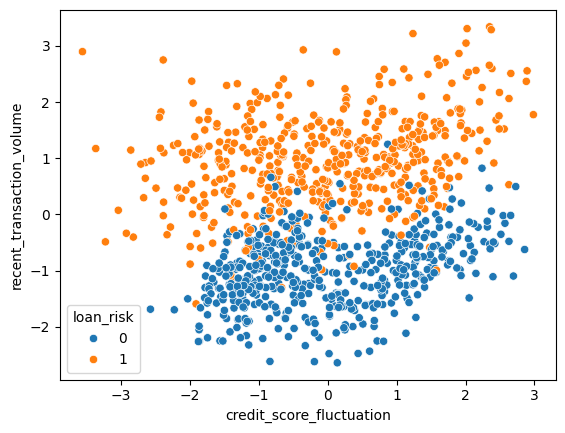

In [21]:
sns.scatterplot(x=df["credit_score_fluctuation"], y=df["recent_transaction_volume"], hue=df["loan_risk"])

In [22]:
X = df.drop("loan_risk", axis=1)

In [23]:
y = df["loan_risk"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [38]:
linear = SVC(kernel="linear")
linear.fit(X_train, y_train)
y_pred3 = linear.predict(X_test)

In [39]:
confusion_matrix(y_test, y_pred3)

array([[109,  12],
       [  9, 120]])

In [40]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       121
           1       0.91      0.93      0.92       129

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250



In [41]:
param_grid = {
    "C": [0.1, 1, 10, 100, 1000],
    "kernel": ["rbf"],
    "gamma": ["scale","auto"],
}

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
grid = GridSearchCV(estimator=SVC(), param_grid=param_grid)

In [44]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto'], 'kernel': ['rbf']})

In [45]:
grid.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [46]:
y_pred2 = grid.predict(X_test)

In [47]:
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       121
           1       0.93      0.92      0.93       129

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

[[112   9]
 [ 10 119]]


In [48]:
df = pd.read_csv("9-seismic_activity_svm.csv")

In [49]:
df.head()

,underground_wave_energy,vibration_axis_variation,seismic_event_detected
0,9.539392,-3.000000,0
1,9.558241,-2.939394,0
2,9.576669,-2.878788,0
3,9.594678,-2.818182,0
4,9.612272,-2.757576,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   underground_wave_energy   400 non-null    float64
 1   vibration_axis_variation  400 non-null    float64
 2   seismic_event_detected    400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


<Axes: xlabel='underground_wave_energy', ylabel='vibration_axis_variation'>

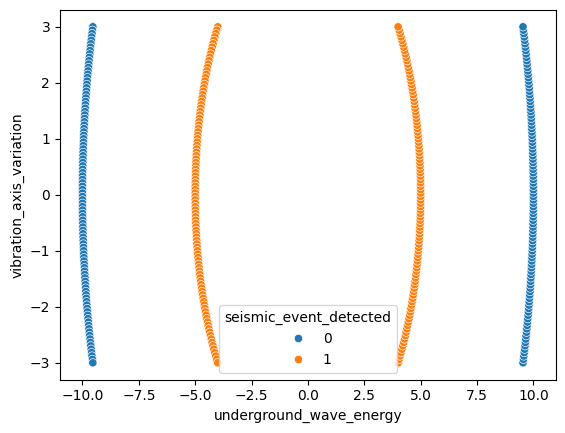

In [51]:
sns.scatterplot(x=df["underground_wave_energy"], y=df["vibration_axis_variation"], hue=df["seismic_event_detected"])

In [52]:
df["underground_wave_energy**2"] = df["underground_wave_energy"] ** 2
df["vibration_axis_variation**2"] = df["vibration_axis_variation"] ** 2
df["underground_wave_energy*vibration_axis_variation"] = df["underground_wave_energy"] * df["vibration_axis_variation"]

In [53]:
df

,underground_wave_energy,vibration_axis_variation,seismic_event_detected,underground_wave_energy**2,vibration_axis_variation**2,underground_wave_energy*vibration_axis_variation
0,9.539392,-3.000000,0,91.000000,9.000000,-28.618176
1,9.558241,-2.939394,0,91.359963,8.640037,-28.095434
2,9.576669,-2.878788,0,91.712580,8.287420,-27.569197
3,9.594678,-2.818182,0,92.057851,7.942149,-27.039548
4,9.612272,-2.757576,0,92.395776,7.604224,-26.506569
...,...,...,...,...,...,...
395,-4.170824,-2.757576,1,17.395776,7.604224,11.501364
396,-4.130115,-2.818182,1,17.057851,7.942149,11.639415
397,-4.088102,-2.878788,1,16.712580,8.287420,11.768779
398,-4.044745,-2.939394,1,16.359963,8.640037,11.889099


In [54]:
X = df.drop("seismic_event_detected", axis=1)
y = df["seismic_event_detected"]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [58]:
import plotly.express as px

In [59]:
linear = SVC(kernel="linear")
linear.fit(X_train, y_train)
y_pred4 = linear.predict(X_test)

In [60]:
print(classification_report(y_test, y_pred4))
print(confusion_matrix(y_test, y_pred4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        52

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

[[48  0]
 [ 0 52]]


In [61]:
df = pd.read_csv("9-seismic_activity_svm.csv")

In [62]:
df

,underground_wave_energy,vibration_axis_variation,seismic_event_detected
0,9.539392,-3.000000,0
1,9.558241,-2.939394,0
2,9.576669,-2.878788,0
3,9.594678,-2.818182,0
4,9.612272,-2.757576,0
...,...,...,...
395,-4.170824,-2.757576,1
396,-4.130115,-2.818182,1
397,-4.088102,-2.878788,1
398,-4.044745,-2.939394,1


In [63]:
X = df.drop("seismic_event_detected", axis=1)
y = df["seismic_event_detected"]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)
rbf = SVC(kernel="rbf")
rbf.fit(X_train, y_train)
y_pred = rbf.predict(X_test)

In [65]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        52

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

[[48  0]
 [ 0 52]]
